In [2]:
#import all the libraries

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
print("Success importing!!!")

Success importing!!!


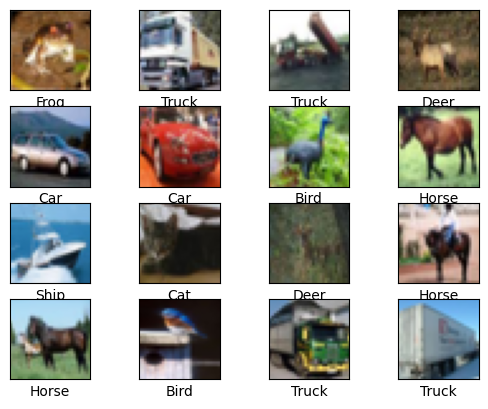

Epoch 1/20
1563/1563 [==============================] - 27s 17ms/step - loss: 1.5051 - accuracy: 0.4530 - val_loss: 1.2536 - val_accuracy: 0.5610
Epoch 2/20
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1329 - accuracy: 0.5983 - val_loss: 1.1507 - val_accuracy: 0.5911
Epoch 3/20
1563/1563 [==============================] - 29s 18ms/step - loss: 0.9866 - accuracy: 0.6525 - val_loss: 0.9955 - val_accuracy: 0.6503
Epoch 4/20
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8905 - accuracy: 0.6882 - val_loss: 0.9460 - val_accuracy: 0.6701
Epoch 5/20
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8261 - accuracy: 0.7098 - val_loss: 0.9349 - val_accuracy: 0.6693
Epoch 6/20
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7679 - accuracy: 0.7318 - val_loss: 0.9307 - val_accuracy: 0.6730
Epoch 7/20
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7161 - accuracy: 0.7488 - val_loss: 0.9047 -

INFO:tensorflow:Assets written to: image_classifier.model\assets


INFO:tensorflow:Assets written to: image_classifier.model\assets


In [3]:
#This code is an example of a convolutional neural network (CNN) that is trained to classify images from the CIFAR-10 dataset into one of 10 different classes.
#The first section loads the CIFAR-10 dataset using the load_data() function from the keras.datasets module. The dataset is split into a training set and a testing set. The pixel values of the images are normalized to be between 0 and 1.
#The next section displays 16 random images from the training set with their corresponding labels.
#The model is defined as a Sequential model from the keras.models module, which is a linear stack of layers. The layers are added to the model in order. The first layer is a Conv2D layer with 32 filters, each of size 3x3, and a ReLU activation function. The input_shape parameter specifies that the input images are 32x32 pixels with 3 color channels. The next layer is a MaxPooling2D layer with a pool size of 2x2. This downsamples the feature maps by taking the maximum value in each 2x2 region. The process is repeated with two more Conv2D and MaxPooling2D layers with 64 filters each, followed by a Flatten layer that flattens the output from the convolutional layers into a 1D vector. Finally, there are two fully connected (Dense) layers with 64 and 10 neurons, respectively. The last layer uses a softmax activation function to output a probability distribution over the 10 classes.
#The compile() method is used to specify the loss function, optimizer, and evaluation metric for the model. In this case, the sparse_categorical_crossentropy loss function is used, which is appropriate for multi-class classification problems where the target variable is integers representing class labels. The adam optimizer is used, which is a popular choice for stochastic gradient descent, and the accuracy metric is used to evaluate the performance of the model.
#The fit() method is used to train the model on the training set for 20 epochs. The validation_data parameter is used to evaluate the model on the testing set after each epoch. The training loss and accuracy, as well as the validation loss and accuracy, are printed to the console after each epoch.
#The evaluate() method is used to evaluate the performance of the trained model on the testing set. The loss and accuracy metrics are printed to the console.
#Finally, the model is saved to a file called image_classifier.model, and then loaded from the file. An example image is loaded using OpenCV and passed to the model to predict the class label. The predicted class label is printed to the console.

(training_images, training_labels), (testing_images, testing_labels)=datasets.cifar10.load_data()

training_images, testing_images=training_images/255, testing_images/255

class_names=['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])
plt.show()

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=20, validation_data=(testing_images, testing_labels))


#This code evaluates the model's performance on a testing set of images and their respective labels. 
#The model.evaluate() function returns the loss and accuracy metrics of the model's performance on the testing set. 
#The loss variable contains the average loss of the model on the testing set, while the accuracy variable contains the 
#percentage of correctly classified images. These metrics are printed to the console.
#This code saves the trained model to a file called image_classifier.model.

loss, accuracy=model.evaluate(testing_images, testing_labels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

model.save('image_classifier.model')

1/1 [==============================] - 0s 82ms/step
prediction is Truck


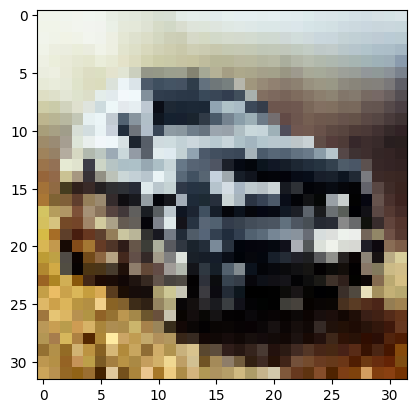

In [4]:
#This code loads the saved model from the file called image_classifier.model.
#This code loads an image of a car called car_resized.png using OpenCV. 
#The image is then converted from the default BGR format to RGB format. 
#This is done because the machine learning model expects input images to be in RGB format.
#This code displays the loaded image using the plt.imshow() function from the matplotlib library. 
#The cmap=plt.cm.binary argument sets the color map to binary, which means that the image will be displayed in black and white.
#This code predicts the class of the loaded image using the model.predict() function. The input to the function is an array 
#containing the image data, which is normalized by dividing each pixel value by 255. 
#The output of the function is an array containing the predicted probabilities of the image belonging to each class.
#This code finds the index of the predicted class with the highest probability using the np.argmax() function. 
#The class_names variable contains the names of the classes, which are "airplane" and "car". 
#The predicted class name is printed to the console using an f-string.

model=models.load_model('image_classifier.model')
img=cv.imread('car_resized.png')
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)

plt.imshow(img, cmap=plt.cm.binary)
prediction=model.predict(np.array([img])/255)

index=np.argmax(prediction)
print(f'prediction is {class_names[index]}')

313/313 [==============================] - 2s 7ms/step


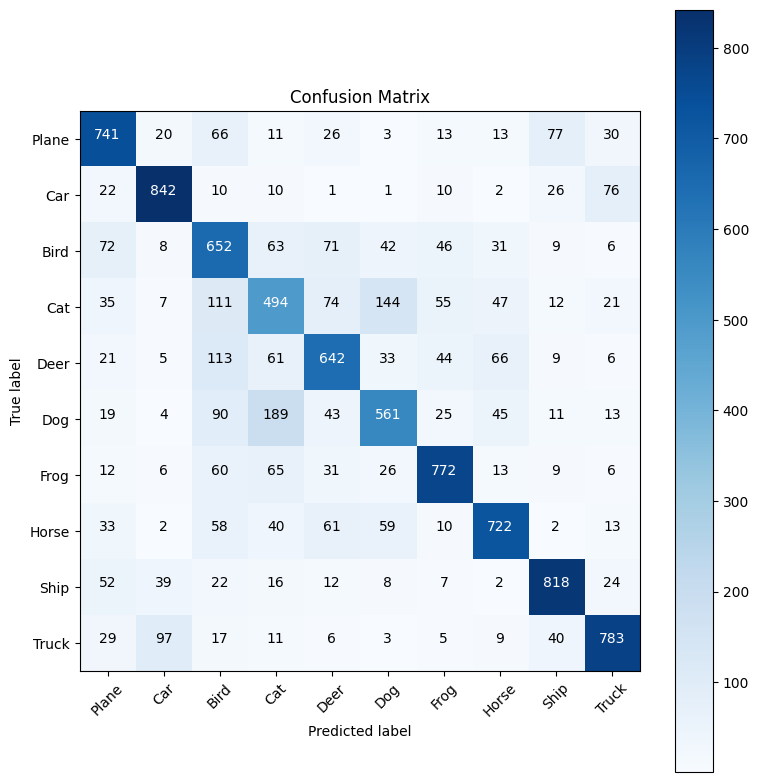

In [5]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# load the trained model
model = models.load_model('image_classifier.model')

# load the testing dataset
(_, _), (testing_images, testing_labels) = datasets.cifar10.load_data()

# normalize the pixel values
testing_images = testing_images / 255.

# get the predicted labels for the testing images
predicted_labels = np.argmax(model.predict(testing_images), axis=-1)

# create the confusion matrix
cm = confusion_matrix(testing_labels, predicted_labels)

# plot the confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

threshold = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

#This code will load the trained model and the testing dataset, and normalize the pixel values of the testing images. Then, it will use the confusion_matrix function to create the confusion matrix, and plot it using matplotlib. The x-axis and y-axis labels will be the class names, and the text inside each box of the matrix will be the number of correctly predicted samples for each class.

In [8]:
from sklearn.metrics import classification_report

y_pred = model.predict(testing_images)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(testing_labels, y_pred_classes, target_names=class_names))

313/313 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

       Plane       0.72      0.74      0.73      1000
         Car       0.82      0.84      0.83      1000
        Bird       0.54      0.65      0.59      1000
         Cat       0.51      0.49      0.50      1000
        Deer       0.66      0.64      0.65      1000
         Dog       0.64      0.56      0.60      1000
        Frog       0.78      0.77      0.78      1000
       Horse       0.76      0.72      0.74      1000
        Ship       0.81      0.82      0.81      1000
       Truck       0.80      0.78      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

